# Mounting Google Drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime 
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import os
% matplotlib inline


# Creating Directories to input the results

In [ ]:
#path='/content/drive/Shared drives/OPIM5512 - Data Sci. w Python/Data/Final Results'
#try:
  #os.mkdir(path)
#except OSError:
  #print ("Creation of the directory %s failed" % path)
#else:
  #print ("Successfully created the directory %s " % path)

# Installing  Yahoo Stock Information database package

In [ ]:
#%pip install fix_yahoo_finance 

In [ ]:
import fix_yahoo_finance as fyf
from pandas_datareader import data as pdr
fyf.pdr_override()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


# Filtering Stock tickers 

In [ ]:
T=['VGT','XLK','IYW','SKYY','FTEC']
CD=['XLY','VCR','FXD','IBUY','XRT']
HC=['XLV','VHT','IBB','IHI','FBT']
F=['VFH','FNCL','XLF','IYF','FAS']
U=['FUTY','XLU','VPU','IDU','FXU']
CS=['XLP','VDC','FSTA','KXI','RHS']
web='https://screener.fidelity.com/ftgw/etf/goto/snapshot/snapshot.jhtml?symbols='


In [ ]:
table=pd.DataFrame()
for x in T:
  ETFpayload = pd.read_html(web+x)
  table=pd.concat([table,ETFpayload[17].loc[0:2,0]],axis=0)
t=table[table.duplicated(keep=False)]
t=t.drop_duplicates()
if len(t)>3:
  t=t.iloc[0:3]
for x in range(3):
  t.iloc[x,0]=''.join(filter(str.isalpha,t.iloc[x,0]))
t

,0
0,AAPL
1,MSFT
2,V


In [ ]:
table=pd.DataFrame()
for x in CD:
  ETFpayload = pd.read_html(web+x)
  table=pd.concat([table,ETFpayload[17].loc[0:2,0]],axis=0)
cd=table[table.duplicated(keep=False)]
cd=cd.drop_duplicates()
if len(cd)>3:
  cd=cd.iloc[0:3]
for x in range(3):
  cd.iloc[x,0]=''.join(filter(str.isalpha,cd.iloc[x,0]))
cd

,0
0,AMZN
1,HD
2,TSLA


In [ ]:
table=pd.DataFrame()
for x in HC:  
  ETFpayload = pd.read_html(web+x)
  table=pd.concat([table,ETFpayload[17].loc[0:2,0]],axis=0)
hc=table[table.duplicated(keep=False)]
hc=hc.drop_duplicates()
if len(hc)>3:
  hc=hc.iloc[0:3]
for x in range(3):
  hc.iloc[x,0]=''.join(filter(str.isalpha,hc.iloc[x,0]))
hc

,0
0,JNJ
1,UNH
2,MRK


In [ ]:
table=pd.DataFrame()
for x in F:
  ETFpayload = pd.read_html(web+x)
  if x=='FAS':
    table=pd.concat([table,ETFpayload[16].loc[0:2,0]],axis=0)
  else:
    table=pd.concat([table,ETFpayload[17].loc[0:2,0]],axis=0)
f=table[table.duplicated(keep=False)]
for x in range(len(f)):
  if f.iloc[x,0]=='BRK/B':
    f.iloc[x,0]=f.iloc[-1,0]
f=f.drop_duplicates()
if len(f)>3:
  f=f.iloc[0:3]
for x in range(3):
  f.iloc[x,0]=''.join(filter(str.isalpha,f.iloc[x,0]))
f

,0
0,JPM
2,BAC
1,V


In [ ]:
table=pd.DataFrame()
for x in U:
  ETFpayload = pd.read_html(web+x)
  table=pd.concat([table,ETFpayload[17].loc[0:2,0]],axis=0)
u=table[table.duplicated(keep=False)]
u=u.drop_duplicates()
if len(u)>3:
  u=u.iloc[0:3]
for x in range(3):
  u.iloc[x,0]=''.join(filter(str.isalpha,u.iloc[x,0]))
u

,0
0,NEE
1,D
2,DUK


In [ ]:
table=pd.DataFrame()
for x in CS:
  ETFpayload = pd.read_html(web+x)
  table=pd.concat([table,ETFpayload[17].loc[0:2,0]],axis=0)
cs=table[table.duplicated(keep=False)]
cs=cs.drop_duplicates()
if len(cs)>3:
  cs=cs.iloc[0:3]
for x in range(3):
  cs.iloc[x,0]=''.join(filter(str.isalpha,cs.iloc[x,0]))
cs

,0
0,PG
1,PEP
2,KO


# Setting Data directories

In [ ]:
def directory(df):
  if str(df)==str(t):
    dir='/content/drive/Shared drives/OPIM5512 - Data Sci. w Python/Data/Final Results/Technology/'
  elif str(df)==str(cd):
    dir='/content/drive/Shared drives/OPIM5512 - Data Sci. w Python/Data/Final Results/Consumer Discretionary/'
  elif str(df)==str(hc):
    dir='/content/drive/Shared drives/OPIM5512 - Data Sci. w Python/Data/Final Results/Healthcare/'
  elif str(df)==str(f):
    dir='/content/drive/Shared drives/OPIM5512 - Data Sci. w Python/Data/Final Results/Financials/'
  elif str(df)==str(u):
    dir='/content/drive/Shared drives/OPIM5512 - Data Sci. w Python/Data/Final Results/Utilities/'
  else:
    dir='/content/drive/Shared drives/OPIM5512 - Data Sci. w Python/Data/Final Results/Consumer Staples/'
  return dir

# Data Extraction

In [ ]:
def dataextract(df):
  one=str(df.iloc[0,0])
  two=str(df.iloc[1,0])
  three=str(df.iloc[2,0])
  data1 = pdr.get_data_yahoo(one,start='2017-01-01')
  data2 = pdr.get_data_yahoo(two,start='2017-01-01')
  data3 = pdr.get_data_yahoo(three,start='2017-01-01')
  return data1,data2,data3,one,two,three

# Data Imputation



In [ ]:
def dataimpute(data):
  dt = datetime.date(2017, 1, 1)
  end = datetime.date.today()-datetime.timedelta(days=2)
  day=pd.date_range(start=dt,end=end,freq='D')
  temp=pd.DataFrame(data=day,columns=['Date'])
  temp
  date=data.index
  for i in date:
      for x in range(len(temp)):
        if i==temp.loc[x,'Date']:
          temp.loc[x,'High']=data.loc[i,'High']
          temp.loc[x,'Low']=data.loc[i,'Low']
          temp.loc[x,'Open']=data.loc[i,'Open']
          temp.loc[x,'Close']=data.loc[i,'Close']
          temp.loc[x,'Adj Close']=data.loc[i,'Adj Close']
          temp.loc[x,'Volume']=data.loc[i,'Volume']
  #Imputation
  #temp=temp.interpolate(method="linear") #Another Method
  temp=temp.ffill()
  temp=temp.bfill()
  temp=temp.set_index('Date')  
  return temp



# Data Visualization

In [ ]:
#setting figure size
from matplotlib.pylab import rcParams


In [ ]:
def graph(data,dir1,number,time):
   rcParams['figure.figsize'] = 20,10
   params = {'legend.fontsize': 'x-large',
            'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
   rcParams.update(params)

   figure, axes = plt.subplots(nrows=4, ncols=2,sharex=True)
   figure.subplots_adjust(hspace=0.4, wspace=0.4)
   x=list(data.index.values)
 
   axes[0,0].plot(x, data['Volume'], color='blue') 
   axes[0,0].set_title('VOLUME VERSUS DATE')
   #axes[0,0].set(xlabel='DATES',ylabel='VOLUME')
   

   axes[0,1].plot(x, data['High'], color='g')
   axes[0,1].plot(x, data['Low'], color='r')
   axes[0,1].plot(x, data['Open'], color='m')
   axes[0,1].plot(x, data['Close'], color='c')
   axes[0,1].plot(x, data['Adj Close'], color='y')
   axes[0,1].set_title('PRICES VERSUS DATE')
   #axes[0,1].set(xlabel='DATES',ylabel='PRICES')

   axes[1,0].plot(x, data['High'], color='g')
   axes[1,0].set_title('HIGH PRICES VERSUS DATE')
   #axes[1,0].set(xlabel='DATES',ylabel='HIGH PRICES')

   axes[1,1].plot(x, data['Low'], color='r')
   axes[1,1].set_title('LOW PRICES VERSUS DATE')
   #axes[1,1].set(xlabel='DATES',ylabel='LOW PRICES')

   axes[2,0].plot(x, data['Open'], color='m')
   axes[2,0].set_title('OPEN PRICES VERSUS DATE')
   #axes[2,0].set(xlabel='DATES',ylabel='OPEN PRICES')

   axes[2,1].plot(x, data['Close'], color='c')
   axes[2,1].set_title('CLOSE PRICES VERSUS DATE')
   #axes[2,1].set(xlabel='DATES',ylabel='CLOSE PRICES')

   axes[3,0].plot(x, data['Adj Close'], color='y',)
   #axes[3,0].set_xticklabels([])
   axes[3,0].set_title('ADJUSTED CLOSE PRICES VERSUS DATE')
   #axes[3,0].set(xlabel='DATES',ylabel='ADJUSTED CLOSE PRICES')
  
   axes[3,1].plot(x, data['Open'], color='m') 
   axes[3,1].plot(x, data['Close'], color='c')
   axes[3,1].plot(x, data['Adj Close'], color='y')
   #axes[3,1].set_xticklabels([])
   axes[3,1].set_title('OPEN,CLOSE AND PRICES VERSUS DATE')
   #axes[3,1].set(xlabel='DATES',ylabel='PRICES')

   figure.savefig(dir1+'/'+time+'/VOLUME AND PRICES GRAPH '+number+' '+time+'.png')
   plt.clf()
   
   figure, axes = plt.subplots(nrows=3, ncols=2,sharex=True)
   figure.subplots_adjust(hspace=0.4, wspace=0.4)
 
   sns.distplot(data['Volume'],ax=axes[0,0])
   axes[0,0].set_title('VOLUME')
  
   sns.distplot(data['High'],ax=axes[0,1])
   axes[0,1].set_title('HIGH PRICE')

   sns.distplot(data['Low'],ax=axes[1,0])
   axes[1,0].set_title('LOW PRICES')
  
   sns.distplot(data['Open'],ax=axes[1,1])
   axes[1,1].set_title('OPEN PRICES')

   sns.distplot(data['Close'],ax=axes[2,0])
   axes[2,0].set_title('CLOSE PRICES')

   sns.distplot(data['Adj Close'],ax=axes[2,1])
   axes[2,1].set_title('ADJUSTED CLOSE PRICES')  
  
   figure.savefig(dir1+'/'+time+'/DENSITY PLOTS '+number+' '+time+'.png')
   plt.clf()

   figure, axes = plt.subplots(nrows=3, ncols=2,sharex=True)
   figure.subplots_adjust(hspace=0.4, wspace=0.4)
 
   sns.boxplot(data['Volume'],ax=axes[0,0])
   axes[0,0].set_title('VOLUME')
  
   sns.boxplot(data['High'],ax=axes[0,1])
   axes[0,1].set_title('HIGH PRICE')

   sns.boxplot(data['Low'],ax=axes[1,0])
   axes[1,0].set_title('LOW PRICES')
  
   sns.boxplot(data['Open'],ax=axes[1,1])
   axes[1,1].set_title('OPEN PRICES')

   sns.boxplot(data['Close'],ax=axes[2,0])
   axes[2,0].set_title('CLOSE PRICES')

   sns.boxplot(data['Adj Close'],ax=axes[2,1])
   axes[2,1].set_title('ADJUSTED CLOSE PRICES')  
  
   figure.savefig(dir1+'/'+time+'/BOX PLOTS '+number+' '+time+ ".png")
   plt.clf()

In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 46.8MB 774kB/s
     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 604kB 15.1MB/s 
     |████████████████████████████████| 3.1MB 25.9MB/s 
     |████████████████████████████████| 71kB 8.2MB/s 
     |████████████████████████████████| 296kB 47.9MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=563a4c903f499774bd489593c3b403dd3b8bdc86f22c4a048667257cd43e0830
  Stored in directory: /tmp/pip-ephem-wheel-cache-fhu1rlzz/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=84746b243a83e2e518bfdd6716c9df8648bcb838a8ce28ce24f45c800d22e38a
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=2919

In [ ]:
from pandas_profiling import ProfileReport

# Correlation  Matrix and Scatter Plots

In [ ]:
def datainspect(data,dir1,number,time):
  pp=sns.pairplot(data,height=2)
  pp.savefig(dir1 + "/"+time+ "/Pairplot new "+ number +" "+ time +  ".png")
  plt.clf()
  correlation_matrix = data.corr()
  sns.set(rc={'figure.figsize':(10,10)})
  sns_plot1=sns.heatmap(data=correlation_matrix, annot=True)
  fig = sns_plot1.get_figure()
  fig.savefig(dir1+"/"+time+"/Correlation matrix new "+number+" "+time+".png")
  plt.clf()
  profile=ProfileReport(data)
  profile.to_file(dir1+"/"+time+"/Report new "+number+" "+time+".html")

# Data Preprocessing

In [ ]:
def datapreprocess(data):
  scaler = MinMaxScaler() 
  scaled_values = scaler.fit_transform(data) 
  data.loc[:,:] = scaled_values
  return data


# Just Sampling for technology to get results

In [ ]:
def datawrangling(d):
  dir=directory(d)
  data1,data2,data3,one,two,three=dataextract(d)
  # define the name of the directory to be created
  comp=[one,two,three]
  #for j in comp:
    #p=dir
    #q=j+"/"+"before"
    #path=p+q
    #try:
      #os.makedirs(path)
    #except OSError:
      #print ("Creation of the directory %s failed" % path)
    #else:
      #print ("Successfully created the directory %s" % path)
    #q=j+"/"+"after"
    #path=p+q
    #try:
      #os.makedirs(path)
    #except OSError:
      #print ("Creation of the directory %s failed" % path)
    #else:
      #print ("Successfully created the directory %s" % path)
  data1=dataimpute(data1)
  data2=dataimpute(data2)
  data3=dataimpute(data3)
  dir1=os.path.join(dir, one)
  dir2=os.path.join(dir, two)
  dir3=os.path.join(dir, three)
  time='before'
  #graph(data1,dir1,one,time)
  #graph(data2,dir2,two,time)
  #graph(data3,dir3,three,time)
  #datainspect(data1,dir1,one,time)
  #datainspect(data2,dir2,two,time)
  #datainspect(data3,dir3,three,time)
  #datapreprocessing
  scaled_data1=datapreprocess(data1)
  scaled_data2=datapreprocess(data2)
  scaled_data3=datapreprocess(data3)
  scaled_data1['Adj Close']=data1['Adj Close']
  scaled_data2['Adj Close']=data2['Adj Close']
  scaled_data3['Adj Close']=data3['Adj Close']
  time='after'
  #graph(scaled_data1,dir2,two,time)
  #graph(scaled_data1,dir3,three,time)
  #datainspect(scaled_data1,dir1,one,time)
  #datainspect(scaled_data2,dir2,two,time)
  #datainspect(scaled_data3,dir3,three,time)
  return scaled_data1,scaled_data2,scaled_data3


In [ ]:
scaled_data1,scaled_data2,scaled_data3=datawrangling(t)
#datawrangling(cd)
#datawrangling(hc)
#datawrangling(f)
#datawrangling(u)
#datawrangling(cs)


In [ ]:
df1=scaled_data1['Adj Close']
df1

Date
2017-01-01    0.000482
2017-01-02    0.000482
2017-01-03    0.000482
2017-01-04    0.000000
2017-01-05    0.002188
                ...   
2020-06-29    0.981464
2020-06-30    0.993249
2020-07-01    0.990556
2020-07-02    0.990556
2020-07-03    0.990556
Name: Adj Close, Length: 1280, dtype: float64

# Modeling Functions

In [ ]:
def datapartition(d):
  dir=directory(d)
  data1,data2,data3,one,two,three=dataextract(d)
  scaled_data1,scaled_data2,scaled_data3=datawrangling(d)
  # define the name of the directory to be created
  comp=[one,two,three]
  #for j in comp:
    #p=dir
    #q=j+"/"+""
    #path=p+q
    #try:
      #os.makedirs(path)
    #except OSError:
      #print ("Creation of the directory %s failed" % path)
    #else:
      #print ("Successfully created the directory %s" % path)
    
   
  
     

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=pd.DataFrame(df.iloc[:,:-1])
y=pd.DataFrame(df.iloc[:,-1])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

NameError: ignored

# LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
def linear(X_train,y_train):
  linear=LinearRegression()
  linear.fit(X_train,y_train)
  y_pred=linear.predict(X_test)
  mse=metrics.mean_squared_error(y_test,y_pred)
  rmse1=np.sqrt(mse)
  return y_pred,rmse1


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
def logit(X_train,y_train):
  logit=LogisticRegression()
  logit.fit(X_train,y_train)
  y_pred=logit.predict(X_test)
  mse=metrics.mean_squared_error(y_test,y_pred)
  rmse2=np.sqrt(mse)
  return y_pred,rmse2

# LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
def lasso(X_train,y_train):
  lasso=Lasso()
  lasso.fit(X_train,y_train)
  y_pred=lasso.predict(X_test) 
  mse=metrics.mean_squared_error(y_test,y_pred)
  rmse3=np.sqrt(mse)
  return y_pred,rmse3


# ELASTIC NET REGRESSION

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
def lasso(X_train,y_train):
  EN=ElasticNet()
  EN.fit(X_train,y_train)
  y_pred=EN.predict(X_test)
  mse=metrics.mean_squared_error(y_test,y_pred)
  rmse4=np.sqrt(mse)
  return y_pred,rmse4

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103075218314292.22, tolerance: 37376622983.714294
  positive)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

# DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def lasso(X_train,y_train):
  DT=DecisionTreeRegressor()
  DT.fit(X_train,y_train)
  y_pred=DT.predict(X_test)
  mse=metrics.mean_squared_error(y_test,y_pred)
  rmse5=np.sqrt(mse)
  return y_pred,rmse5

# KNN MODEL

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
def lasso(X_train,y_train):
  KNN=KNeighborsRegressor()
  KNN.fit(X_train,y_train)
  y_pred=KNN.predict(X_test)
  mse=metrics.mean_squared_error(y_test,y_pred)
  rmse6=np.sqrt(mse)
  return y_pred,rmse6

# SVR MODEL

In [ ]:
from sklearn.svm import SVR

In [ ]:
def lasso(X_train,y_train):
  SVR=SVR()
  SVR.fit(X_train,y_train)
  y_pred=SVR.predict(X_test)
  mse=metrics.mean_squared_error(y_test,y_pred)
  rmse7=np.sqrt(mse)
  return y_pred,rmse7

UnboundLocalError: ignored

# ARIMA model


In [ ]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
def trainarima(df):
  train_data = df[0:int(len(df)*0.7)]
  return train_data
train = trainarima(df)

In [ ]:
def testarima(df):
  test_data =df[int(len(df)*0.7)-1:]
  return test_data

In [ ]:
test = testarima(df)

In [ ]:
def plotarima(train_data,test_data):
  plt.figure(figsize=(12,7))
  plt.title('Prices')
  plt.xlabel('Dates')
  plt.ylabel('Prices')
  plt.plot(train_data, 'blue', label='Training Data')
  plt.plot(test_data, 'green', label='Testing Data')
  plt.legend()
  return plt.show()

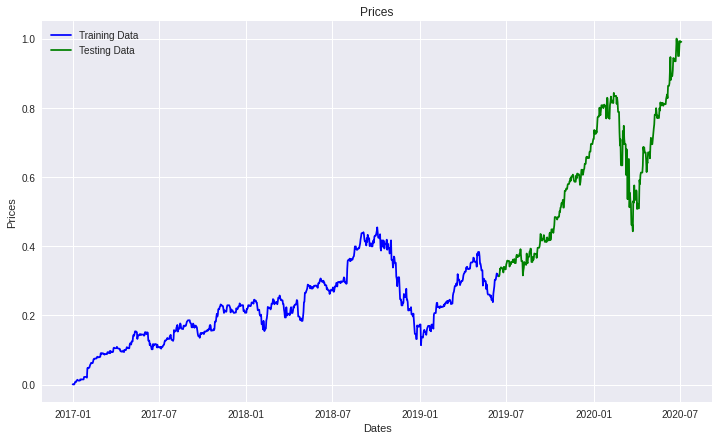

In [ ]:
plotarima(train,test)

Check stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    plt.style.use('seaborn')
    rcParams['figure.figsize'] = 20,10
    orig = plt.plot(timeseries,label='Original')
    mean = plt.plot(rolmean, label='Rolling Mean')
    std = plt.plot(rolstd, label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [ ]:
test_stationarity(train)

Results of Dickey-Fuller Test:
Test Statistic                  -2.171506
p-value                          0.216749
#Lags Used                      15.000000
Number of Observations Used    880.000000
Critical Value (1%)             -3.437803
Critical Value (5%)             -2.864830
Critical Value (10%)            -2.568522
dtype: float64


Whie noise test:

Time Series Model

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
!pip install pyramid-arima
from pyramid.arima import auto_arima

     |████████████████████████████████| 604kB 3.4MB/s 


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision 

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
def armodel(train_data,test_data): 
  plt.figure(figsize=(12,7))
  aa=auto_arima(train_data, start_p=1, start_q=1, max_p=3, max_q=3, 
                m=12,start_P=0, seasonal=True,d=1, D=1, trace=True, 
                error_action='ignore',  suppress_warnings=True, stepwise=True)
  train_ar = train_data.values
  test_ar = test_data.values
  history = [x for x in train_ar]
  print(history)
  predictions = list()
  for t in range(len(test_ar)):
      model = ARIMA(history, order=(aa.order))
      model_fit = model.fit()
      output = model_fit.forecast()
      yhat = output[0]
      predictions.append(yhat)
      obs = test_ar[t]
      history.append(obs)
  error = mean_squared_error(test_ar, predictions)
  print('RMSE '+ str(sqrt(error)))
  plt.plot(train_data, 'green', color='blue', label='Training Data')
  plt.plot(test_data.index, predictions, marker='o', linestyle='dashed', 
          label='Predicted Price')
  plt.plot(test_data.index, test_data, color='red', label='Actual Price')
  plt.title('Price Prediction')
  plt.xlabel('Dates')
  plt.ylabel('Prices')
  plt.legend()
  return predictions,rmse

In [ ]:
from sklearn import metrics
def armodel(train_data,test_data): 
  plt.figure(figsize=(12,7))
  model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
  model.fit(train_data)
  forecast = model.predict(n_periods=len(test_data))
  forecast = pd.DataFrame(forecast,index = test_data.index,columns=['Prediction'])  
  mse=metrics.mean_squared_error(test_data,forecast)
  rmse8=np.sqrt(mse)
  print('RMSE '+ str(rmse8))
  plt.plot(train_data, 'green', color='blue', label='Training Data')
  plt.plot(test_data.index, forecast, marker='o', linestyle='dashed', 
          label='Predicted Price')
  plt.plot(test_data.index, test_data, color='red', label='Actual Price')
  plt.title('Price Prediction')
  plt.xlabel('Dates')
  plt.ylabel('Prices')
  plt.legend()
  return rmse8

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-5923.264, BIC=-5894.483, Fit time=1.640 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-5921.365, BIC=-5911.771, Fit time=0.157 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=-5920.436, BIC=-5906.045, Fit time=0.164 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-5920.466, BIC=-5906.076, Fit time=0.250 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-5916.673, BIC=-5892.688, Fit time=0.389 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=-5920.081, BIC=-5886.503, Fit time=1.571 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-5916.709, BIC=-5892.725, Fit time=1.272 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=-5919.625, BIC=-5886.047, Fit time=0.835 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=-5917.504, BIC=-5898.317, Fit time=1.285 seconds
Fit ARIMA: order=(3

0.26910806889308825

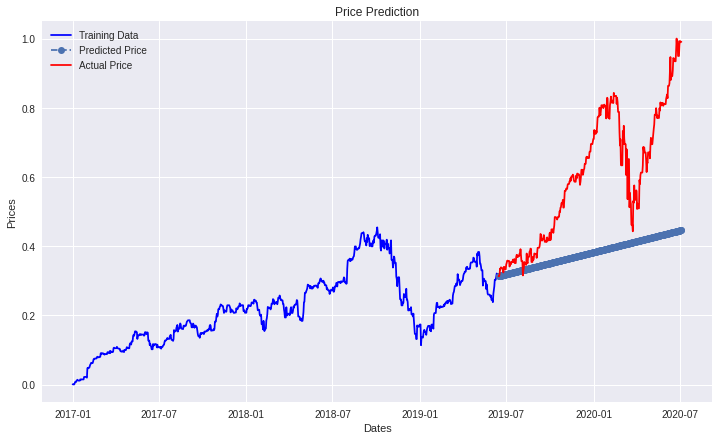

In [ ]:
armodel(train,test)

NameError: ignored

# COMPARING MODELS

In [ ]:
def compare(rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7):
  rmse=pd.DataFrame()
  rmse['Model']=['LINEAR REGRESSION','LOGISTIC REGRESSION','LASSO REGRESSION','ELASTIC NET REGRESSION','DECISION TREE','KNN MODEL','SVR MODEL']
  rmse['RMSE']=[rmse1,rmse2,rmse3,rmse4,rmse5,rmse6,rmse7]
  l=np.min(rmse["RMSE"])
  for i in range(len(rmse)):
      if l==rmse.iloc[i]['RMSE']:
        return ("BEST MODEL IS "+rmse.iloc[i]["Model"]+" with RMSE:"+str(l))